In [17]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Loading datafile into dataframes
wine_data = "Resources/wine.csv"

In [18]:
wine_data = pd.read_csv(wine_data)
wine_data

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685
4591,Litmus Wines White Pinot 2015,Litmus Wines,White Pinot,2015,NaN,NaN,4.0,25,4.0,91,24.500,24.500,0.163265,0.163265
4592,Rollin Père et Fils Pernand-Vergelesses 'Les C...,Rollin Père et Fils,Pernand-Vergelesses 'Les Cloux',2017,Burgundy,Côte de Beaune White,4.0,25,4.1,330,20.160,20.160,0.198413,0.203373


In [19]:
# Droping rows with missing data
wine_clean_data = wine_data.dropna()
wine_clean_data

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685


In [20]:
# Droping duplicate rows if any are found
wine_clean_data = wine_clean_data.drop_duplicates(keep = 'first')
wine_clean_data

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685


In [21]:
wine_clean_data['RegionalVariety'] = wine_clean_data['RegionalVariety'].str.strip()
wine_clean_data

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685


In [22]:
# wine_cheap = < $100
wine_cheap = wine_clean_data[wine_clean_data['WinePrice'] < 100]
wine_cheap

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
372,Jermann W... Dreams Bianco (Were Dreams...) 2016,Jermann,W... Dreams Bianco (Were Dreams...),2016,Northern Italy,White,4.3,392,4.2,3406,73.115,73.115,0.058811,0.057444
373,Tolpuddle Chardonnay 2015,Tolpuddle,Chardonnay,2015,Australian,Chardonnay,4.3,146,4.2,787,67.165,67.165,0.064021,0.062533
397,Château de Béru Clos Béru Monopole Chablis 2012,Château de Béru,Clos Béru Monopole Chablis,2012,Burgundy,Chablis,4.1,108,4.1,602,61.500,61.500,0.066667,0.066667
422,Allende Martires Rioja 2013,Allende,Martires Rioja,2013,Spanish,Rioja White,4.6,30,4.4,297,98.000,98.000,0.046939,0.044898
463,Peter Michael L'Après-Midi Sauvignon Blanc 2015,Peter Michael,L'Après-Midi Sauvignon Blanc,2015,Californian,Sauvignon Blanc,4.5,84,4.3,967,86.000,86.000,0.052326,0.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4587,Bachelet-Monnot Maranges 1er Cru 'La Fussière'...,Bachelet-Monnot,Maranges 1er Cru 'La Fussière' Blanc,2015,Burgundy,Côte de Beaune White,4.0,25,4.1,134,28.450,28.450,0.140598,0.144112
4588,Allimant-Laugner Pinot Gris 2016,Allimant-Laugner,Pinot Gris,2016,Alsace,Pinot Gris,4.0,25,3.7,137,20.700,20.700,0.193237,0.178744
4589,Domaine du Tunnel Saint-Péray Roussanne 2018,Domaine du Tunnel,Saint-Péray Roussanne,2018,Northern Rhône,Saint-Péray,4.0,25,4.0,543,23.530,23.530,0.169996,0.169996
4590,Brown Brothers Patricia Chardonnay 2010,Brown Brothers,Patricia Chardonnay,2010,Australian,Chardonnay,4.0,25,4.0,194,29.480,29.480,0.135685,0.135685


In [77]:
# wine_expensive = > $100
wine_exp = wine_clean_data[wine_clean_data['WinePrice'] > 100]
wine_exp

,FullName,Winery,WineName,Year,Region,RegionalVariety,VintageRating,VintageRatingCount,WineRating,WineRatingCount,VintagePrice,WinePrice,VintageRatingPriceRatio,WineRatingPriceRatio
0,Domaine Coche-Dury Meursault Les Rougeots 2001,Domaine Coche-Dury,Meursault Les Rougeots,2001,Burgundy,Côte de Beaune White,4.9,25,4.7,755,806.580,806.580,0.006075,0.005827
1,Joseph Drouhin Montrachet Grand Cru Marquis de...,Joseph Drouhin,Montrachet Grand Cru Marquis de Laguiche,2015,Burgundy,Côte de Beaune White,4.8,46,4.6,1191,680.000,680.000,0.007059,0.006765
2,Marcassin Marcassin Vineyard Chardonnay 2013,Marcassin,Marcassin Vineyard Chardonnay,2013,Californian,Chardonnay,4.8,28,4.6,884,448.000,448.000,0.010714,0.010268
3,M. Chapoutier Ermitage Le Méal Blanc 2006,M. Chapoutier,Ermitage Le Méal Blanc,2006,Northern Rhône,White,4.8,31,4.5,414,164.675,164.675,0.029148,0.027327
4,Domaine Coche-Dury Corton-Charlemagne Grand Cr...,Domaine Coche-Dury,Corton-Charlemagne Grand Cru,2007,Burgundy,Côte de Beaune White,4.8,35,4.7,454,3478.360,3478.360,0.001380,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,Château Haut-Brion La Clarté de Haut-Brion Pes...,Château Haut-Brion,La Clarté de Haut-Brion Pessac-Léognan Blanc (...,2013,Bordeaux,White,4.0,137,4.1,1193,107.000,107.000,0.037383,0.038318
801,Etienne Sauzet Puligny-Montrachet 1er Cru 'Cha...,Etienne Sauzet,Puligny-Montrachet 1er Cru 'Champ Canet',2005,Burgundy,Côte de Beaune White,4.0,32,4.3,649,110.680,110.680,0.036140,0.038851
802,Etienne Sauzet Puligny-Montrachet 1er Cru 'Cha...,Etienne Sauzet,Puligny-Montrachet 1er Cru 'Champ Gain',2009,Burgundy,Côte de Beaune White,4.0,28,4.2,163,199.480,199.480,0.020052,0.021055
803,Arnaud Ente Bourgogne Chardonnay 2016,Arnaud Ente,Bourgogne Chardonnay,2016,Burgundy,White,4.0,25,4.2,367,145.000,145.000,0.027586,0.028966


In [26]:
#wine_cheap = < $100
Regionalvariety_cheap_count = wine_cheap.groupby('RegionalVariety')['WineName'].nunique()
Regionalvariety_cheap_df = pd.DataFrame({'Count': Regionalvariety_cheap_count})
Regionalvariety_cheap_df

,Count
RegionalVariety,
Albariño,25
Chablis,103
Chardonnay,176
Chenin Blanc,84
Condrieu,29
Côte Chalonnaise White,41
Côte de Beaune White,256
Gavi,6
Gewürztraminer,30


In [56]:
#wine expensive= > $100
Regionalvariety_expensive_count = wine_expensive.groupby('RegionalVariety')['WineName'].nunique()
Regionalvariety_expensive = pd.DataFrame({'Count': Regionalvariety_expensive_count})
Regionalvariety_expensive

,Count
RegionalVariety,
Chablis,17
Chardonnay,24
Chenin Blanc,2
Condrieu,1
Côte de Beaune White,76
Pinot Gris,1
Riesling,15
Rioja White,2
Sauvignon Blanc,1


In [30]:
# Ratings range - Low: 0-3
# Ratings range - High: 4-5 

winecheap_by_variety = wine_cheap.groupby('RegionalVariety')


cheap_low_wine_rating_variety = winecheap_by_variety['WineRating'].min()
cheap_high_wine_rating_variety = winecheap_by_variety['WineRating'].max()
cheap_avg_wine_rating_variety = winecheap_by_variety['WineRating'].mean()


winecheap_by_variety_df = pd.DataFrame({'Lowest Wine Rating %': (cheap_low_wine_rating_variety/5)*100,
                                    'Highest Wine Rating %': (cheap_high_wine_rating_variety/5)*100,
                                    'Overall Average wine rating %': (cheap_avg_wine_rating_variety/5)*100})
                                    
# Percentage formatting
winecheap_by_variety_df.style.format({'Lowest Wine Rating %': '{:,.2f}%',
                                            'Highest Wine Rating %': '{:,.2f}%',
                                            'Overall Average wine rating %': '{:,.2f}%'})

winecheap_by_variety_df.sort_values(by=['Highest Wine Rating %'], inplace=True, ascending=True)

winecheap_by_variety_df

,Lowest Wine Rating %,Highest Wine Rating %,Overall Average wine rating %
RegionalVariety,,,
Torrontes,76.0,76.0,76.000000
Viognier,74.0,80.0,78.000000
Soave,76.0,80.0,79.333333
Muscadet,78.0,80.0,79.600000
Moscatel,80.0,80.0,80.000000
Müller Thurgau,82.0,82.0,82.000000
Vin Jaune,78.0,82.0,81.000000
Saint-Péray,78.0,82.0,80.000000
Grauburgunder,82.0,82.0,82.000000


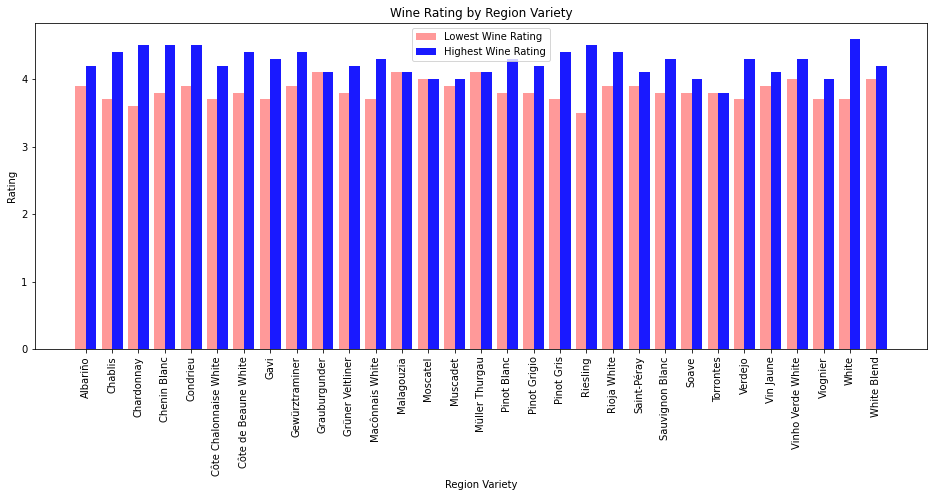

In [103]:
#wine_cheap = < $100
labels_cheap_variety = list(winecheap_by_variety.groups.keys()) # xtick labels
ind = np.arange(len(cheap_low_wine_rating_variety))  # the x locations for the groups
width = 0.4       # the width of the bars

plt.figure(figsize = (16,6))

# plot bars
red_bars = plt.bar(ind, cheap_low_wine_rating_variety, width, color='r', alpha=.4, label='Lowest Wine Rating')
blue_bars = plt.bar(ind + width, cheap_high_wine_rating_variety, width, color='b', alpha=.9, label='Highest Wine Rating')

# title and labels
plt.ylabel('Rating')
plt.xlabel('Region Variety')
plt.title('Wine Rating by Region Variety')
locations = ind + width / 2  # xtick locations
plt.xticks(locations, labels_cheap_variety, rotation='vertical')

plt.legend();


In [79]:
exp_by_variety = wine_exp.groupby('RegionalVariety')

# Calculations
exp_low_wine_rating_variety = exp_by_variety['WineRating'].min()
exp_high_wine_rating_variety = exp_by_variety['WineRating'].max()
exp_avg_wine_rating_variety = exp_by_variety['WineRating'].mean()

# RegionalVariety Above $100 dataframe
exp_by_variety_df = pd.DataFrame({'Lowest Wine Rating %': (exp_low_wine_rating_variety/5)*100,
                                 'Highest Wine Rating %': (exp_high_wine_rating_variety/5)*100,
                                 'Overall Average wine rating %': (exp_avg_wine_rating_variety/5)*100})

# Percentage formatting
exp_by_variety_df.style.format({'Lowest Wine Rating %': '{:,.2f}%',
                                          'Highest Wine Rating %': '{:,.2f}%',
                                          'Overall Average wine rating %': '{:,.2f}%'})

,Lowest Wine Rating %,Highest Wine Rating %,Overall Average wine rating %
RegionalVariety,,,
Chablis,82.00%,90.00%,87.32%
Chardonnay,84.00%,92.00%,88.15%
Chenin Blanc,86.00%,88.00%,87.80%
Condrieu,88.00%,88.00%,88.00%
Côte de Beaune White,82.00%,94.00%,88.38%
Pinot Gris,84.00%,84.00%,84.00%
Riesling,80.00%,94.00%,87.59%
Rioja White,88.00%,92.00%,89.33%
Sauvignon Blanc,86.00%,86.00%,86.00%


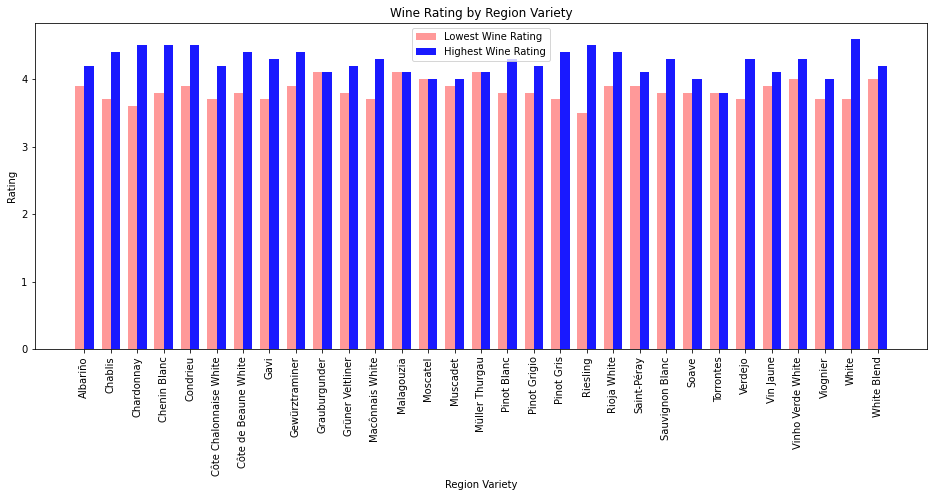

In [102]:
labels_exp_variety = list(exp_by_variety.groups.keys()) # xtick labels
ind = np.arange(len(cheap_low_wine_rating_variety))  # the x locations for the groups
width = 0.35       # the width of the bars

plt.figure(figsize = (16,6))

red_bars = plt.bar(ind, cheap_low_wine_rating_variety, width, color='r', alpha=.4, label='Lowest Wine Rating')
blue_bars = plt.bar(ind + width, cheap_high_wine_rating_variety, width, color='b', alpha=.9, label='Highest Wine Rating')

plt.ylabel('Rating')
plt.xlabel('Region Variety')
plt.title('Wine Rating by Region Variety')
locations = ind + width / 2  # xtick locations
plt.xticks(locations, labels_cheap_variety, rotation='vertical')

plt.legend();

In [104]:
cheap_avg_wine_rating_variety.nlargest(5)

RegionalVariety
Vinho Verde White       4.188235
Côte de Beaune White    4.166966
Verdejo                 4.155000
Condrieu                4.147917
Pinot Gris              4.144737
Name: WineRating, dtype: float64

In [105]:
exp_avg_wine_rating_variety.nlargest(5)

RegionalVariety
White Blend             4.477778
Rioja White             4.466667
Côte de Beaune White    4.419012
Chardonnay              4.407576
Condrieu                4.400000
Name: WineRating, dtype: float64

In [106]:
print("Below $100 : " + str(wine_cheap.WineRating.mean()))
print("Above $100 : " + str(wine_exp.WineRating.mean()))

Below $100 : 4.112521789657176
Above $100 : 4.395460440985732
